## **AUTHORS**

1. Pauline Kariuki
2. Norman Mwapea
3. Angela Chesire
4. Carlton Ogolla
5. Emmanuel Chol

## 1.BUSINESS UNDERSTANDING


### **1.1 OVERVIEW**

The United States has long been a cornerstone of Kenya’s public health funding, providing about $2.5 billion between 2020 and 2025, with 80% supporting health programs through USAID and PEPFAR. In January 2025, an executive order paused U.S. foreign aid, followed by sweeping budget cuts in July 2025, abruptly freezing most U.S.-funded health programs in Kenya. The impact was immediate: ART clinics closed, community HIV programs were halted, and essential prevention efforts like PrEP distribution and DREAMS support for adolescent girls were suspended. Globally, modeling suggests that sustained aid cuts could cause 10.8 million additional HIV infections and 2.9 million deaths by 2030. Regional data from Mozambique show a 15% rise in new infections and a 10% rise in HIV-related deaths following similar disruptions. The UNAIDS models warn of millions of new infections and deaths if donor funding stops. Kenya — a key PEPFAR partner — is already feeling the strain: clinic closures, staff layoffs, and reduced ART coverage.

**Our goal is to quantify Kenya’s specific impact: How much of this projected global rise in infections and deaths could occur here if aid cuts persist — and to build predictive models that help policymakers act early.**

### **1.2 BACKGROUND**

Kenya’s success in controlling HIV has been closely tied to external funding, especially through PEPFAR and USAID, which have financed ART programs, health worker salaries, and community prevention initiatives. The 2025 suspension of U.S. aid exposed the country’s heavy reliance on donor support, triggering job losses, service interruptions, and data system breakdowns.
Programs such as DREAMS, which helped keep 66,000 girls HIV-free, were paused, while ART clinics and community outreach services faced closure. These disruptions underscore a broader question of sustainability and resilience in Kenya’s health system. Understanding how changes in foreign aid affect HIV outcomes and the healthcare workforce is vital for developing adaptive, evidence-based funding strategies that can protect future public health gains.

### **1.3 KEY OBJECTIVES - Quantifying Kenya’s share of the global HIV impact**

**•	Kenya’s Projected Impact**

If global modeling predicts millions of new infections and deaths, what proportion of this burden might occur in Kenya? We will use a Time-Series Analysis – to track Kenya’s HIV trends (testing, ART coverage, mortality) before and after funding shifts.

**•	Aid–Outcome Relationships**

How have changes in U.S. funding levels historically correlated with:HIV testing rates, ART coverage, AIDS-related mortality in Kenya? We will use regression models (Multiple Linear, Ridge) – to estimate how much HIV outcomes change per unit drop in aid funding.

**•	County-Level Vulnerability**

Which counties or regions in Kenya are most dependent on donor funding, and therefore most vulnerable when aid is suspended? We will use clustering (K-Means) – to group counties based on aid dependency, workforce reliance, and health outcome sensitivity.

**•	Future Scenario Forecasting**

If foreign aid cuts persist or deepen:
1. How many new HIV infections could occur in Kenya (2025–2029)?
2. How many additional new infections per day compared to current trends?
3. How many AIDS-related deaths might result?
4. How many new child infections, child deaths, and orphans could emerge?
We will use predictive modeling (Random Forest, Gradient Boosting) – to simulate Kenya’s future infection and death counts under different funding scenarios.

### **1.4 SUCCESS METRICS**

Success will be defined through a mix of technical, analytical, and policy outcomes:
1.	**Model Accuracy:** Achieve ≥80% predictive accuracy (R² ≥ 0.8) in forecasting HIV infections, deaths, and ART coverage under various funding scenarios.
2.	**Data Quality:** Build a clean, verified, and reproducible dataset integrating aid, workforce, and HIV outcome data.
3.	**Insight Clarity:** Produce analyses that clearly demonstrate relationships between donor funding changes and health outcomes.
4.	**Policy Relevance:** Deliver actionable recommendations for the Ministry of Health, donors, and county health systems.
5.	**Scalability:** Ensure the framework is modular and reusable, allowing integration of new data sources such as PEPFAR, World Bank, and Kenya Health Data Portal datasets.

### **1.5 KEY STAKEHOLDERS**

1. **Kenya Ministry of Health (MOH)** – For strategic planning, resource allocation, and health workforce deployment.
2. **PEPFAR, USAID, and Global Fund** – For evaluating funding effectiveness and sustainability.
3. **County Governments** – For identifying vulnerable regions and planning localized responses.
4. **Local NGOs and Civil Society** – For evidence-based advocacy and program continuity.
5. **Data Scientists and Researchers** – For advancing models that link foreign aid dynamics to public health outcomes.

### **1.6 RELEVANCE TO KENYA**

This project is vital for Kenya’s public health resilience and policy planning. By quantifying how fluctuations in donor aid influence HIV outcomes and healthcare workforce stability, the analysis will help policymakers design sustainable, data-driven funding frameworks. The findings will inform strategies to maintain critical health services, reduce dependency on external aid, and safeguard Kenya’s progress toward ending the HIV epidemic.


## 2. DATA UNDERSTANDING

In [61]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Counting items
from collections import Counter

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
from sklearn.preprocessing import LabelEncoder, label_binarize , StandardScaler         # Encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD                                          # Dimensionality reduction
from sklearn.naive_bayes import MultinomialNB                                           # Naive Bayes
from sklearn.linear_model import LogisticRegression                                     # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree                              # Decision Tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    classification_report
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime import lime_tabular

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

In [62]:
# Loading the data set into a data frame
df = pd.read_csv("../Raw Data/usaid_kenya.csv")

# Displaying first 5 rows of the data
df

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2005,30SEP2005,28000,42057,8,Project-type interventions - not Investment Related,.,26757
1,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2005,30SEP2005,17875,26849,8,Project-type interventions - not Investment Related,.,26757
2,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01FEB2006,3469,5047,8,Project-type interventions - not Investment Related,.,26757
3,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01APR2006,1138,1655,8,Project-type interventions - not Investment Related,.,26757
4,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01MAY2006,394,573,8,Project-type interventions - not Investment Related,.,26757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80067,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,29,EPA,...,2,Obligations,2024,19AUG2024,64250,62579,13,Technical Cooperation - Other,614819,1121
80068,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2020,25SEP2020,1146864,1327370,13,Technical Cooperation - Other,1146864,276
80069,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2021,28SEP2021,282104,315641,13,Technical Cooperation - Other,282104,267
80070,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2024,02JAN2024,500000,486994,13,Technical Cooperation - Other,500000,235


##### *Observation:* From top to bottom, the data is uniform.

In [63]:
# Check for the shape of our data
print(f"The data has {df.shape[0]} entries and {df.shape[1]} features")

The data has 80072 entries and 56 features


In [64]:
# Check column names 
df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

##### *Observation:* The column names as inconsistent. They contain a mix of snake and camel case. There is need for standardization.

In [65]:
# Standardize column names so they are more intuitive
df.columns = (
    df.columns
    .str.strip()                     # remove leading/trailing spaces
    .str.lower()                     # make all lowercase
    .str.replace(' ', '_')           # replace spaces with underscores
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # remove special characters
)

df.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'managing_agency_id', 'managing_agency_acronym',
       'managing_agency_name', 'managing_subagency_or_bureau_id',
       'managing_subagency_or_bureau_acronym',
       'managing_subagency_or_bureau_name', 'implementing_partner_category_id',
       'implementing_partner_category_name',
       'implementing_partner_subcategory_id',
       'implementing_partner_subcategory_name', 'implementing_partner_id',
       'implementing_partner_name', 'international_category_id',
       'international_category_name', 'international_sector_code',
       'international_sector_name', 'international_purpose_code',
       'international_purpose_name', 'us_category_id', 'us_category_name',
       'us_sector_id', 'us_sector_name', 'funding_account_id',
       'funding_account_name', 'funding_agency_id', 'funding_agency_name',
       'funding_agency

In [66]:
# Checking for the data types and metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80072 entries, 0 to 80071
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_id                             80072 non-null  int64  
 1   country_code                           80072 non-null  object 
 2   country_name                           80072 non-null  object 
 3   region_id                              80072 non-null  int64  
 4   region_name                            80072 non-null  object 
 5   income_group_id                        80072 non-null  float64
 6   income_group_name                      80072 non-null  object 
 7   income_group_acronym                   80072 non-null  object 
 8   managing_agency_id                     80072 non-null  int64  
 9   managing_agency_acronym                80072 non-null  object 
 10  managing_agency_name                   80072 non-null  object 
 11  ma

##### *Observations:* 
1. The data is mostly categorical.  
2. It has some notable missing values.
3. Some columns will need typecasting such as:
    - fiscal_year to integer
    - transaction_date, activity_start_date, activity_end_date to datetime
    - activity_budget_amount to float
    - current_dollar_amount, constant_dollar_amount to float
    - international_sector_code, international_purpose_code to string
    - activity_project_number to string
4. There exist a number of unique identifiers. These offer little analytical value and will thus be dropped.

In [67]:
# ------- [Type Casting] -------
# Convert columns to their correct data types for analysis

# Fiscal year -> convert from object to integer
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'], errors='coerce').astype('Int64')

# Date columns -> convert to datetime format
date_cols = ['transaction_date', 'activity_start_date', 'activity_end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Numeric conversion for budget amount
df['activity_budget_amount'] = pd.to_numeric(df['activity_budget_amount'], errors='coerce')

# Financial columns -> cast to float for consistency in modeling
df['current_dollar_amount'] = df['current_dollar_amount'].astype(float)
df['constant_dollar_amount'] = df['constant_dollar_amount'].astype(float)

In [68]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
country_id,80072.0,404.0,404.0,404.0,404.0,404.0,404.0,0.0
region_id,80072.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
income_group_id,80072.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
managing_agency_id,80072.0,2.106417,1.0,1.0,1.0,1.0,38.0,3.373374
managing_subagency_or_bureau_id,80072.0,63.601009,2.0,19.0,19.0,21.0,999.0,181.821798
implementing_partner_category_id,80072.0,4.949258,1.0,3.0,4.0,8.0,8.0,2.931494
implementing_partner_subcategory_id,80072.0,11.125662,1.0,5.0,8.0,19.0,20.0,7.817254
implementing_partner_id,80072.0,3449361.432848,1000001.0,3990008.0,4000011.0,4001154.0,4021430.0,1144963.638087
international_category_id,80072.0,5.056574,1.0,2.0,3.0,9.0,10.0,3.282771
international_sector_code,80072.0,373.995342,111.0,134.0,152.0,720.0,998.0,306.316465


In [69]:
# Checking statistical summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
country_code,80072,1,KEN,80072
country_name,80072,1,Kenya,80072
region_name,80072,1,Sub-Saharan Africa,80072
income_group_name,80072,1,Lower Middle Income Country,80072
income_group_acronym,80072,1,LMIC,80072
managing_agency_acronym,80072,20,USAID,63735
managing_agency_name,80072,20,U.S. Agency for International Development,63735
managing_subagency_or_bureau_acronym,76894,63,AFR,53601
managing_subagency_or_bureau_name,80072,67,Bureau for Africa,52879
implementing_partner_category_name,80072,8,Enterprises,34906


## 3. DATA PREPARATION 

Data preparation will majorly entail two parts:

### 3.1 Data Cleaning

In [70]:
# Create a copy of the data to retain the original
data = df.copy(deep=True)

#### 3.1.1 Handling Duplicate Values

We will start by confirming the number of duplicates.

In [71]:
# Checking for duplicate values
print("Duplicate records:", data.duplicated().sum())

Duplicate records: 6


There are 6 duplicates. We will drop them and preview our changes.

In [72]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Sanity check
print("Duplicates after cleaning:", data.duplicated().sum())

Duplicates after cleaning: 0


#### 3.1.2 Handling Missing Values

Then move to missing values.

In [73]:
# Checking for missing values
data.isna().sum()

country_id                                   0
country_code                                 0
country_name                                 0
region_id                                    0
region_name                                  0
income_group_id                              0
income_group_name                            0
income_group_acronym                         0
managing_agency_id                           0
managing_agency_acronym                      0
managing_agency_name                         0
managing_subagency_or_bureau_id              0
managing_subagency_or_bureau_acronym      3178
managing_subagency_or_bureau_name            0
implementing_partner_category_id             0
implementing_partner_category_name           0
implementing_partner_subcategory_id          0
implementing_partner_subcategory_name        0
implementing_partner_id                      0
implementing_partner_name                    0
international_category_id                    0
international

From our Data Understanding we found out that the count for highest unique value was a (.), we will fill this with Nan.

In [74]:
# Fill (.) in activity_budget_amount with null
data['activity_budget_amount'] = data['activity_budget_amount'].replace('.', np.nan)

# Sanity check
print("Nulls in activity_budget_amount:", data['activity_budget_amount'].isna().sum())

Nulls in activity_budget_amount: 51112


Dealing with missing values in activity_budget_amount.

❗ Missing values in activity_budget_amount: 63.84%

Top 10 sectors/agencies with missing budgets:
                          managing_agency_name  \
120  U.S. Agency for International Development   
126  U.S. Agency for International Development   
140  U.S. Agency for International Development   
64                         Department of State   
80                         Department of State   
114  U.S. Agency for International Development   
125  U.S. Agency for International Development   
0               African Development Foundation   
143  U.S. Agency for International Development   
117  U.S. Agency for International Development   

                           us_sector_name  missing_count  
120           Direct Administrative Costs          18368  
126                              HIV/AIDS           8307  
140  Protection, Assistance and Solutions           2941  
64            Direct Administrative Costs           2228  
80   Protection, Assistance and Solutions           2195

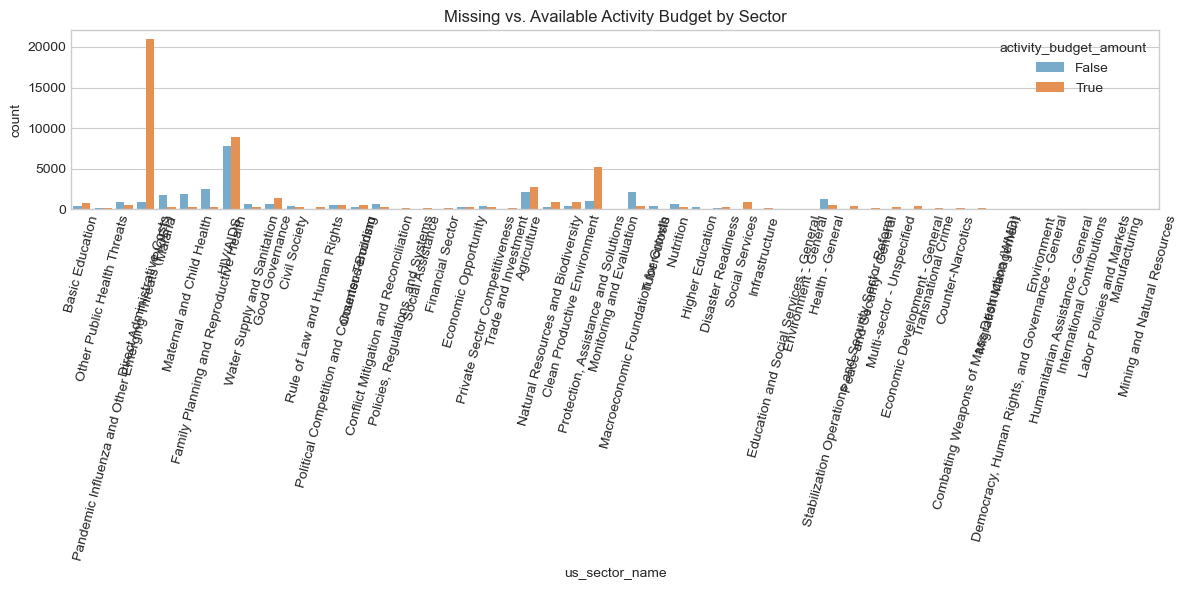


Top correlated numeric features with activity_budget_amount:
current_dollar_amount                  0.168557
constant_dollar_amount                 0.155744
implementing_partner_category_id       0.114003
implementing_partner_subcategory_id    0.113534
submission_activity_id                 0.099439
activity_id                            0.096473
submission_id                          0.077909
fiscal_year                            0.043640
implementing_partner_id                0.030821
transaction_type_id                   -0.011454
dtype: float64


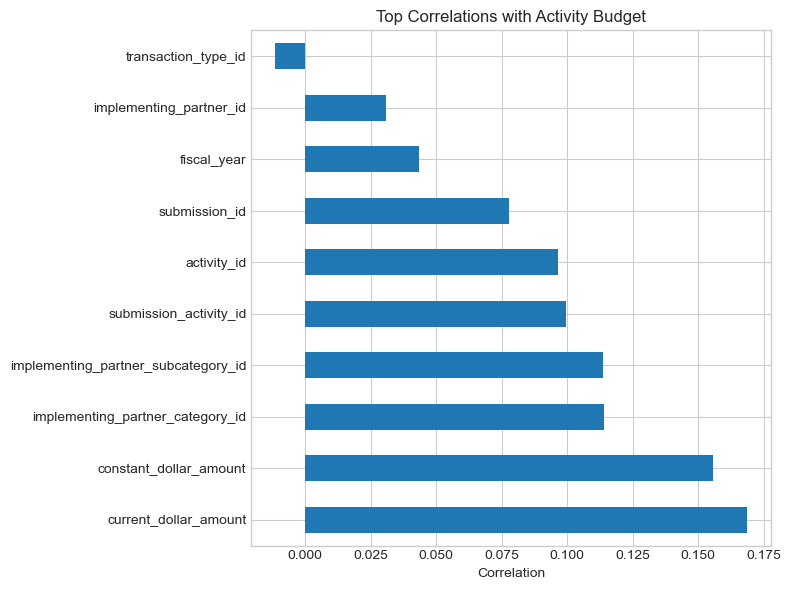

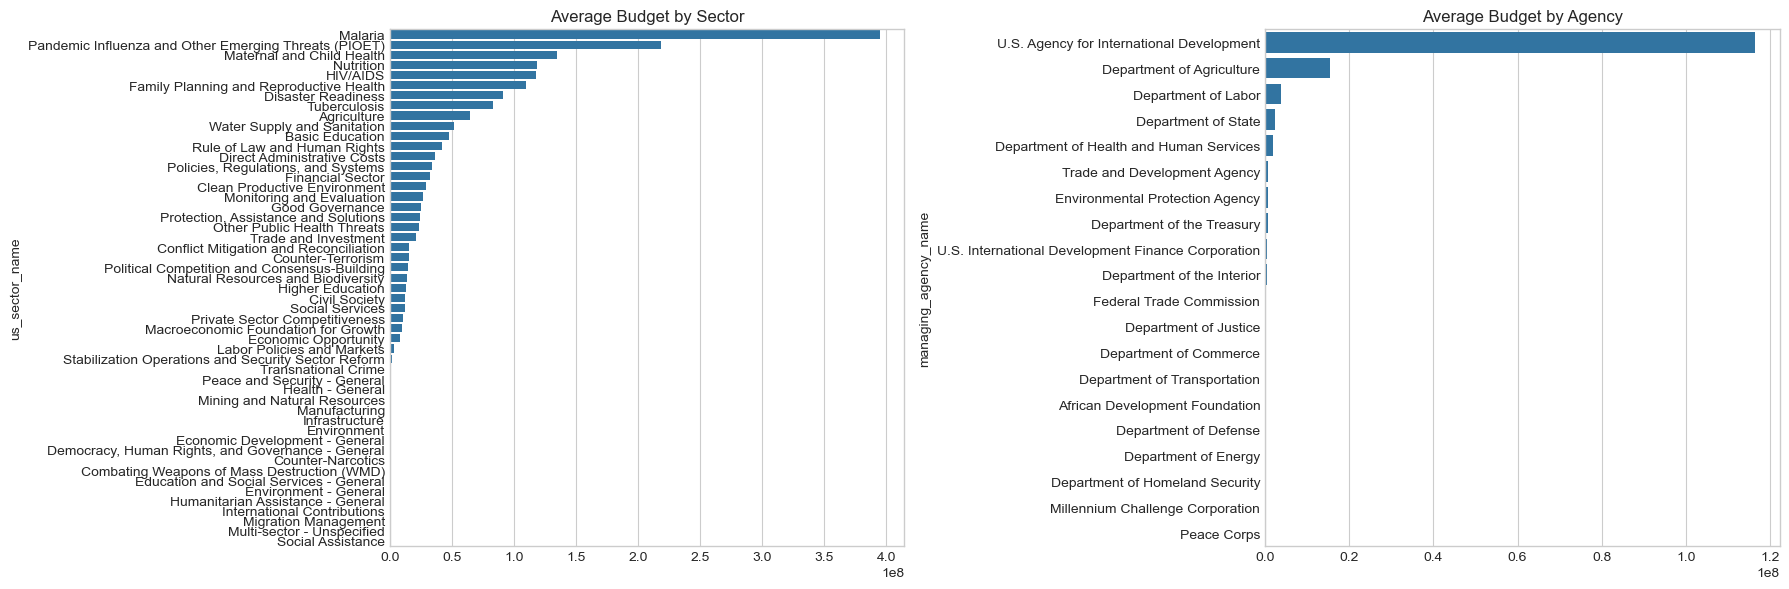


✅ Missing values before: 51112
✅ Missing values after: 635


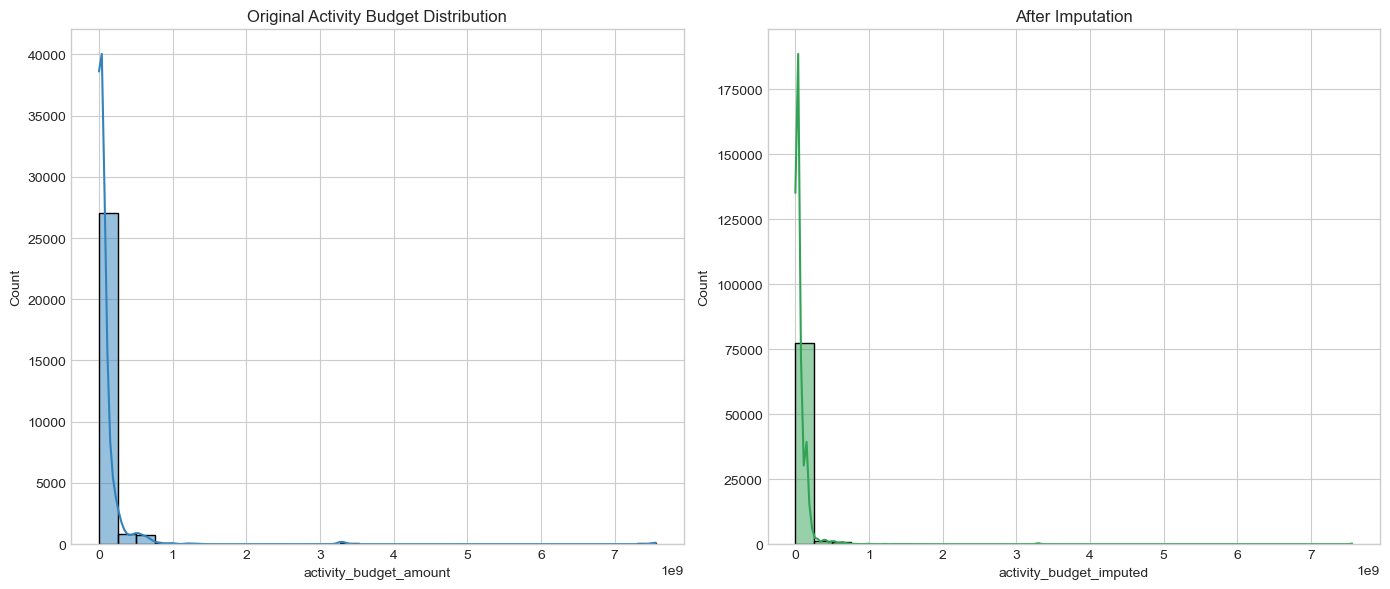


💾 File saved: kenya_aid_with_imputed_budgets.csv


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================
# 1️⃣ LOAD AND PREPARE DATA
# ======================================
# Assuming you already have your cleaned DataFrame `data`
target_col = "activity_budget_amount"

# Check missingness
missing_ratio = data[target_col].isna().mean() * 100
print(f"❗ Missing values in {target_col}: {missing_ratio:.2f}%")

# ======================================
# 2️⃣ EXPLORATORY INSIGHT ON MISSINGNESS
# ======================================
# Which sectors or agencies have missing values?
missing_summary = (
    data[data[target_col].isna()]
    .groupby(["managing_agency_name", "us_sector_name"])
    .size()
    .reset_index(name="missing_count")
    .sort_values("missing_count", ascending=False)
)
print("\nTop 10 sectors/agencies with missing budgets:")
print(missing_summary.head(10))

# Visualize missingness by sector
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x="us_sector_name",
    hue=data[target_col].isna(),
    palette=["#6BAED6", "#FD8D3C"]
)
plt.xticks(rotation=75)
plt.title("Missing vs. Available Activity Budget by Sector")
plt.tight_layout()
plt.show()

# ======================================
# 3️⃣ RELATIONSHIPS TO GUIDE IMPUTATION
# ======================================
# Check correlation of available budgets with relevant numeric variables
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(target_col, errors="ignore")
corrs = data[numeric_cols].corrwith(data[target_col])
corrs = corrs.dropna().sort_values(ascending=False)
print("\nTop correlated numeric features with activity_budget_amount:")
print(corrs.head(10))

# Visualize top correlations
corrs.head(10).plot(kind="barh", figsize=(8, 6), title="Top Correlations with Activity Budget")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

# ======================================
# 4️⃣ SECTOR & AGENCY PATTERNS (BEFORE IMPUTATION)
# ======================================
sector_budget = (
    data.groupby("us_sector_name")[target_col]
    .mean()
    .sort_values(ascending=False)
)

agency_budget = (
    data.groupby("managing_agency_name")[target_col]
    .mean()
    .sort_values(ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=sector_budget.values, y=sector_budget.index, ax=axes[0])
axes[0].set_title("Average Budget by Sector")
sns.barplot(x=agency_budget.values, y=agency_budget.index, ax=axes[1])
axes[1].set_title("Average Budget by Agency")
plt.tight_layout()
plt.show()

# ======================================
# 5️⃣ STRATEGY: IMPUTATION PREP
# ======================================
# We'll base imputations on strong correlates and group-level means

# 5.1 Impute by sector-agency average
data["sector_agency_mean"] = (
    data.groupby(["us_sector_name", "managing_agency_name"])[target_col]
    .transform(lambda x: x.fillna(x.mean()))
)

# 5.2 If still missing, impute by sector-level average
data["sector_mean_imputed"] = (
    data[target_col].fillna(data.groupby("us_sector_name")[target_col].transform("mean"))
)

# 5.3 Combine (sector-agency first, fallback to sector)
data["activity_budget_imputed"] = data["sector_agency_mean"].combine_first(
    data["sector_mean_imputed"]
)

# ======================================
# 6️⃣ CHECK IMPUTATION RESULTS
# ======================================
print("\n✅ Missing values before:", data[target_col].isna().sum())
print("✅ Missing values after:", data["activity_budget_imputed"].isna().sum())

# Distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data[target_col], bins=30, kde=True, ax=axes[0], color="#3182BD")
axes[0].set_title("Original Activity Budget Distribution")
sns.histplot(data["activity_budget_imputed"], bins=30, kde=True, ax=axes[1], color="#31A354")
axes[1].set_title("After Imputation")
plt.tight_layout()
plt.show()

# ======================================
# 7️⃣ SAVE CLEANED VERSION
# ======================================
data.to_csv("kenya_aid_with_imputed_budgets.csv", index=False)
print("\n💾 File saved: kenya_aid_with_imputed_budgets.csv")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

col = "activity_budget_amount"

# 1️⃣ Calculate missingness by agency
missing_by_agency = data.groupby("managing_agency_name")[col].apply(lambda x: x.isna().mean())

tier1 = missing_by_agency[missing_by_agency == 1.0].index                     # completely missing
tier2 = missing_by_agency[(missing_by_agency > 0.7) & (missing_by_agency < 1)].index
tier3 = missing_by_agency[(missing_by_agency >= 0.3) & (missing_by_agency <= 0.7)].index
tier4 = missing_by_agency[missing_by_agency < 0.3].index

df_imputed = data.copy()

# 2️⃣ Tier 1: Fully missing agencies → fill with Kenya-wide median
kenya_median = df_imputed[df_imputed["country_name"] == "Kenya"][col].median()
df_imputed.loc[df_imputed["managing_agency_name"].isin(tier1), col] = kenya_median

# 3️⃣ Tier 2: Agency-specific median if available, else Kenya median
for agency in tier2:
    med = df_imputed.loc[df_imputed["managing_agency_name"] == agency, col].median()
    fill_value = med if not np.isnan(med) else kenya_median
    df_imputed.loc[
        (df_imputed["managing_agency_name"] == agency) & (df_imputed[col].isna()),
        col
    ] = fill_value

# 4️⃣ Tier 3: Agency median if available, else Kenya median
for agency in tier3:
    med = df_imputed.loc[df_imputed["managing_agency_name"] == agency, col].median()
    fill_value = med if not np.isnan(med) else kenya_median
    df_imputed.loc[
        (df_imputed["managing_agency_name"] == agency) & (df_imputed[col].isna()),
        col
    ] = fill_value

# 5️⃣ Tier 4: KNN imputation for agencies with <30% missing
tier4_mask = df_imputed["managing_agency_name"].isin(tier4)
df_t4 = df_imputed[tier4_mask].copy()

# Use numeric features correlated with budgets
numeric_cols = df_t4.select_dtypes(include=[np.number]).columns.tolist()
if col not in numeric_cols:
    numeric_cols.append(col)

# Standardize before KNN
scaler = StandardScaler()
scaled = scaler.fit_transform(df_t4[numeric_cols])

# Apply KNN
knn = KNNImputer(n_neighbors=5)
imputed_scaled = knn.fit_transform(scaled)
imputed_unscaled = scaler.inverse_transform(imputed_scaled)

# Reassign imputed values
df_t4[numeric_cols] = imputed_unscaled
df_imputed.loc[tier4_mask, col] = df_t4[col].values

print(f"✅ Missing after imputation: {df_imputed[col].isna().sum()}")

import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Copy of imputed dataframe
df_val = df_imputed.copy()
col = "activity_budget_amount"

# Create imputation flag
df_val["was_imputed"] = data[col].isna()

# ==========================================================
# ✅ 1. Sector-level totals before vs after imputation
# ==========================================================
sector_totals_before = data.groupby("us_sector_name")[col].sum(min_count=1)
sector_totals_after  = df_val.groupby("us_sector_name")[col].sum()

sector_compare = pd.DataFrame({
    "Before": sector_totals_before,
    "After": sector_totals_after
}).fillna(0)

sector_compare["Change_%"] = (
    (sector_compare["After"] - sector_compare["Before"]) /
    (sector_compare["Before"].replace(0, np.nan))
) * 100

print("📊 Sector-level total changes (%):")
print(sector_compare.sort_values("Change_%", ascending=False).head(10))


# ==========================================================
# ✅ 2. Correlation between agency & sector allocations (fixed)
# ==========================================================
agency_sector_before = data.pivot_table(
    values=col, index="managing_agency_name", columns="us_sector_name", aggfunc="sum"
)
agency_sector_after = df_val.pivot_table(
    values=col, index="managing_agency_name", columns="us_sector_name", aggfunc="sum"
)

# Match common columns only
common_cols = agency_sector_before.columns.intersection(agency_sector_after.columns)

agency_sector_corr_before = agency_sector_before[common_cols].corr()
agency_sector_corr_after  = agency_sector_after[common_cols].corr()

# Calculate mean absolute correlation shift
corr_diff = (agency_sector_corr_after - agency_sector_corr_before).abs().stack().mean()
print(f"\n🔗 Mean correlation shift between agency–sector allocations: {corr_diff:.4f}")


# ==========================================================
# ✅ 3. KS Test — distribution similarity
# ==========================================================
observed = df_val.loc[~df_val["was_imputed"], col].dropna()
imputed  = df_val.loc[df_val["was_imputed"], col].dropna()

ks_stat, ks_pval = ks_2samp(observed, imputed)
print(f"\n🧮 Kolmogorov–Smirnov Test:")
print(f"Statistic = {ks_stat:.3f}, p-value = {ks_pval:.3f}")

if ks_pval > 0.05:
    print("✅ Imputed values follow the same distribution as observed ones (no major bias).")
else:
    print("⚠️ Imputed values differ significantly from observed distribution — investigate further.")


# ==========================================================
# ✅ 4. Visual validation
# ==========================================================
plt.figure(figsize=(10,5))
plt.hist(observed, bins=40, alpha=0.6, label="Observed", color="steelblue")
plt.hist(imputed, bins=40, alpha=0.5, label="Imputed", color="orange")
plt.legend()
plt.title("Observed vs Imputed Distribution of Activity Budget Amounts")
plt.xlabel("Activity Budget Amount")
plt.ylabel("Frequency")
plt.show()

# Optional: visualize correlation consistency
plt.figure(figsize=(7,5))
plt.scatter(
    agency_sector_corr_before.stack(),
    agency_sector_corr_after.stack(),
    alpha=0.6, color="steelblue"
)
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.xlabel("Before Imputation Correlation")
plt.ylabel("After Imputation Correlation")
plt.title("Agency–Sector Correlation Consistency")
plt.show()


# ==========================================================
# ✅ 5. Imputation clustering check
# ==========================================================
imputation_rate_by_sector = df_val.groupby("us_sector_name")["was_imputed"].mean().sort_values(ascending=False)
print("\n📌 Sectors with highest imputation rates:")
print(imputation_rate_by_sector.head(10))


# ==========================================================
# ✅ 6. Final Summary Report
# ==========================================================
total_missing = data[col].isna().sum()
total_records = len(data)
imputed_ratio = total_missing / total_records * 100

print("\n================= 🧾 IMPUTATION QUALITY REPORT =================")
print(f"Total records: {total_records:,}")
print(f"Missing before imputation: {total_missing:,} ({imputed_ratio:.2f}%)")
print(f"Mean correlation shift: {corr_diff:.4f}")
print(f"KS Test p-value: {ks_pval:.3f}")
print("Interpretation:",
      "✅ Stable distributions and low correlation shift → Imputation looks good."
      if ks_pval > 0.05 and corr_diff < 0.05 else
      "⚠️ Imputation may have altered structure — recheck agency or sector patterns.")
print("=================================================================")


✅ Missing after imputation: 0


📊 Sector-level total changes (%):
                                                         Before         After  \
us_sector_name                                                                  
Agriculture                                        2.196350e+11  2.196350e+11   
Basic Education                                    4.818131e+10  4.818131e+10   
Civil Society                                      1.215542e+10  1.215542e+10   
Clean Productive Environment                       3.854625e+10  3.854625e+10   
Combating Weapons of Mass Destruction (WMD)        1.946443e+09  1.946443e+09   
Conflict Mitigation and Reconciliation             1.976745e+10  1.976745e+10   
Counter-Narcotics                                  9.113436e+08  9.113436e+08   
Counter-Terrorism                                  6.761520e+09  6.761520e+09   
Democracy, Human Rights, and Governance - General  7.777449e+06  7.777449e+06   
Direct Administrative Costs                        6.612371e+11  6.612371e+

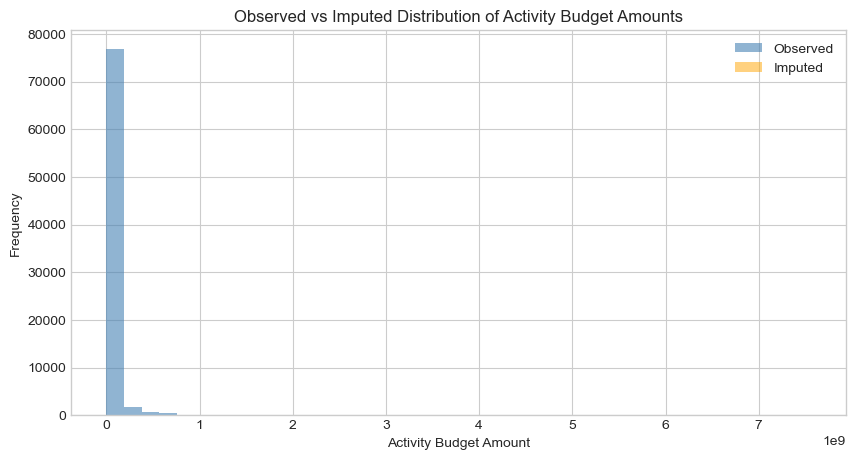

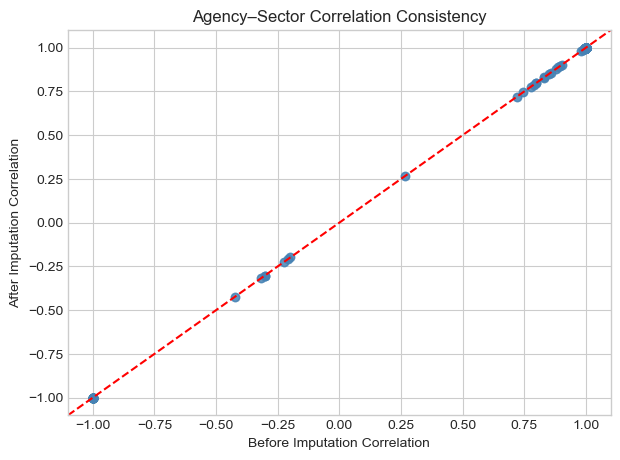


📌 Sectors with highest imputation rates:
us_sector_name
Agriculture                                          0.0
Basic Education                                      0.0
Civil Society                                        0.0
Clean Productive Environment                         0.0
Combating Weapons of Mass Destruction (WMD)          0.0
Conflict Mitigation and Reconciliation               0.0
Counter-Narcotics                                    0.0
Counter-Terrorism                                    0.0
Democracy, Human Rights, and Governance - General    0.0
Direct Administrative Costs                          0.0
Name: was_imputed, dtype: float64

================= 🧾 IMPUTATION QUALITY REPORT =================
Total records: 80,066
Missing before imputation: 0 (0.00%)
Mean correlation shift: 0.0000
KS Test p-value: nan
Interpretation: ⚠️ Imputation may have altered structure — recheck agency or sector patterns.


In [60]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Copy of imputed dataframe
df_val = df_imputed.copy()
col = "activity_budget_amount"

# Create imputation flag
df_val["was_imputed"] = data[col].isna()

# ==========================================================
# ✅ 1. Sector-level totals before vs after imputation
# ==========================================================
sector_totals_before = data.groupby("us_sector_name")[col].sum(min_count=1)
sector_totals_after  = df_val.groupby("us_sector_name")[col].sum()

sector_compare = pd.DataFrame({
    "Before": sector_totals_before,
    "After": sector_totals_after
}).fillna(0)

sector_compare["Change_%"] = (
    (sector_compare["After"] - sector_compare["Before"]) /
    (sector_compare["Before"].replace(0, np.nan))
) * 100

print("📊 Sector-level total changes (%):")
print(sector_compare.sort_values("Change_%", ascending=False).head(10))


# ==========================================================
# ✅ 2. Correlation between agency & sector allocations (fixed)
# ==========================================================
agency_sector_before = data.pivot_table(
    values=col, index="managing_agency_name", columns="us_sector_name", aggfunc="sum"
)
agency_sector_after = df_val.pivot_table(
    values=col, index="managing_agency_name", columns="us_sector_name", aggfunc="sum"
)

# Match common columns only
common_cols = agency_sector_before.columns.intersection(agency_sector_after.columns)

agency_sector_corr_before = agency_sector_before[common_cols].corr()
agency_sector_corr_after  = agency_sector_after[common_cols].corr()

# Calculate mean absolute correlation shift
corr_diff = (agency_sector_corr_after - agency_sector_corr_before).abs().stack().mean()
print(f"\n🔗 Mean correlation shift between agency–sector allocations: {corr_diff:.4f}")


# ==========================================================
# ✅ 3. KS Test — distribution similarity
# ==========================================================
observed = df_val.loc[~df_val["was_imputed"], col].dropna()
imputed  = df_val.loc[df_val["was_imputed"], col].dropna()

ks_stat, ks_pval = ks_2samp(observed, imputed)
print(f"\n🧮 Kolmogorov–Smirnov Test:")
print(f"Statistic = {ks_stat:.3f}, p-value = {ks_pval:.3f}")

if ks_pval > 0.05:
    print("✅ Imputed values follow the same distribution as observed ones (no major bias).")
else:
    print("⚠️ Imputed values differ significantly from observed distribution — investigate further.")


# ==========================================================
# ✅ 4. Visual validation
# ==========================================================
plt.figure(figsize=(10,5))
plt.hist(observed, bins=40, alpha=0.6, label="Observed", color="steelblue")
plt.hist(imputed, bins=40, alpha=0.5, label="Imputed", color="orange")
plt.legend()
plt.title("Observed vs Imputed Distribution of Activity Budget Amounts")
plt.xlabel("Activity Budget Amount")
plt.ylabel("Frequency")
plt.show()

# Optional: visualize correlation consistency
plt.figure(figsize=(7,5))
plt.scatter(
    agency_sector_corr_before.stack(),
    agency_sector_corr_after.stack(),
    alpha=0.6, color="steelblue"
)
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.xlabel("Before Imputation Correlation")
plt.ylabel("After Imputation Correlation")
plt.title("Agency–Sector Correlation Consistency")
plt.show()


# ==========================================================
# ✅ 5. Imputation clustering check
# ==========================================================
imputation_rate_by_sector = df_val.groupby("us_sector_name")["was_imputed"].mean().sort_values(ascending=False)
print("\n📌 Sectors with highest imputation rates:")
print(imputation_rate_by_sector.head(10))


# ==========================================================
# ✅ 6. Final Summary Report
# ==========================================================
total_missing = data[col].isna().sum()
total_records = len(data)
imputed_ratio = total_missing / total_records * 100

print("\n================= 🧾 IMPUTATION QUALITY REPORT =================")
print(f"Total records: {total_records:,}")
print(f"Missing before imputation: {total_missing:,} ({imputed_ratio:.2f}%)")
print(f"Mean correlation shift: {corr_diff:.4f}")
print(f"KS Test p-value: {ks_pval:.3f}")
print("Interpretation:",
      "✅ Stable distributions and low correlation shift → Imputation looks good."
      if ks_pval > 0.05 and corr_diff < 0.05 else
      "⚠️ Imputation may have altered structure — recheck agency or sector patterns.")
print("=================================================================")


The number of missing values is too high. Imputation strategies such as mean or median will introduce bias and we will data integrity. 

##### From our above prompt to check for missing values, we also noticed that there were columns that also had too many missing values 

##### They included:'Activity Start Date', 'Activity End Date','Activity Project Number'. These columns had more than half of their data missing. So we will drop this colummns.

In [15]:
cols_to_drop = ['Activity Start Date', 'Activity End Date', 'Activity Project Number','activity_budget_amount']
data.drop(columns = cols_to_drop, inplace = True)

##### We could also drop the 'Managing Sub-agency or Bureau Acronym' because it does not really affect our data since we have the name of the Managing Sub-agency or Bureau.

In [16]:
data.drop(columns='Managing Sub-agency or Bureau Acronym',inplace=True)

##### With this columns dropped, now we can deal with other columns that had missing values but were too little to make us drop them and or may be too important to drop.

##### For this, we have the column 'Transaction Date'.It has 5474 rows missing but contains dates which may be critical when conducting our Time Series Model. For our data we will fill these date with the Fiscal year but we will keep in mind that the dates are not accurate.

In [17]:
# Clean the Fiscal Year column first
data['Fiscal Year'] = data['Fiscal Year'].astype(str).str.extract(r'(\d{4})', expand=False)

# Coverting Transaction Date to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')

# Appending Fiscal Year with 01-01
data['Fiscal Year'] = pd.to_datetime(data['Fiscal Year'] + '-01-01', errors='coerce')

# Filling missing Transaction Date  missing values
data['Transaction Date'] = data['Transaction Date'].fillna(data['Fiscal Year'])

In [18]:
# Checking if there are any missing values left in Transaction Date
data['Transaction Date'].isna().sum()

0

In [19]:
# Converting back to the year
data['Fiscal Year'] = pd.to_datetime(data['Fiscal Year'])
data['Fiscal Year']=data['Fiscal Year'].dt.year

In [20]:
# Checking for missing values
data.isna().sum()

Country ID                                0
Country Code                              0
Country Name                              0
Region ID                                 0
Region Name                               0
Income Group ID                           0
Income Group Name                         0
Income Group Acronym                      0
Managing Agency ID                        0
Managing Agency Acronym                   0
Managing Agency Name                      0
Managing Sub-agency or Bureau ID          0
Managing Sub-agency or Bureau Name        0
Implementing Partner Category ID          0
Implementing Partner Category Name        0
Implementing Partner Sub-category ID      0
Implementing Partner Sub-category Name    0
Implementing Partner ID                   0
Implementing Partner Name                 0
International Category ID                 0
International Category Name               0
International Sector Code                 0
International Sector Name       

##### We may also remove columns that may be redundant for our analysis. These are columns that give no information differentiating other columns. A starting point may be columns with only one unique value for example we may not need a column for 'Country Name' since our data contains information about Kenya only.

In [21]:
print(data.columns)
column_list = data.columns.tolist()
print(column_list)

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Funding Agency Acronym', 'Foreign Assistance Objec

##### We will also get rid of columns that may contain similar information like Managing Agency Name and Managing Sub-agency or Bureau Name

In [22]:
red_cols = ['Country ID', 'Country Code', 'Country Name', 'Region ID','Region Name', 'Income Group ID',\
            'Income Group Name','Income Group Acronym','Managing Agency ID','Managing Agency Acronym',\
            'Managing Sub-agency or Bureau ID','Implementing Partner Category ID','Implementing Partner Sub-category ID',\
            'Implementing Partner ID','International Category ID','International Sector Code','International Purpose Code',\
            'US Category ID','US Sector ID','Funding Account ID','Funding Agency ID','Funding Agency Acronym',\
            'Foreign Assistance Objective ID','Aid Type Group ID','Transaction Type ID','aid_type_id','International Category Name',\
            'International Sector Name','International Purpose Name','Submission ID','submission_activity_id',\
            'Managing Sub-agency or Bureau Name','Implementing Partner Sub-category Name','Funding Account Name' ]
data.drop(columns = red_cols , inplace=True)

In [23]:
data.head()

,Managing Agency Name,Implementing Partner Category Name,Implementing Partner Name,US Category Name,US Sector Name,Funding Agency Name,Foreign Assistance Objective Name,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name
0,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related
1,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related
2,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related
3,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related
4,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related


In [24]:
# Save the file as a csv document
data1 = pd.DataFrame(data)
data1.to_csv('cleaned_data',index=False)

### 3.2 Feature Engineering

#### We could convert the Current Dollar Amount into Categorical data which may be simpler to use during modelling

In [25]:
data['Transaction_Size']=pd.qcut(data['Current Dollar Amount'],\
                                 q=3, labels=['Low','Medium','High'] )

In [26]:
data.head()

,Managing Agency Name,Implementing Partner Category Name,Implementing Partner Name,US Category Name,US Sector Name,Funding Agency Name,Foreign Assistance Objective Name,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size
0,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium
1,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium
2,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low
3,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low
4,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80066 entries, 0 to 80071
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Managing Agency Name                80066 non-null  object        
 1   Implementing Partner Category Name  80066 non-null  object        
 2   Implementing Partner Name           80066 non-null  object        
 3   US Category Name                    80066 non-null  object        
 4   US Sector Name                      80066 non-null  object        
 5   Funding Agency Name                 80066 non-null  object        
 6   Foreign Assistance Objective Name   80066 non-null  object        
 7   Aid Type Group Name                 80066 non-null  object        
 8   Activity ID                         80066 non-null  int64         
 9   Activity Name                       80066 non-null  object        
 10  Activity Description       

In [28]:
data['Foreign Assistance Objective Name'].unique()

array(['Economic', 'Military'], dtype=object)

##### We could change the name of columns like 'Foreign Assistance Objective Name' to objective in short for it to be simpler to deal with.

In [29]:
# Renaming the column
data = data.rename(columns={'Foreign Assistance Objective Name': 'Objective'})

In [30]:
data['US Sector Name'].unique()

array(['Basic Education', 'Other Public Health Threats',
       'Pandemic Influenza and Other Emerging Threats (PIOET)',
       'Direct Administrative Costs', 'Malaria',
       'Maternal and Child Health',
       'Family Planning and Reproductive Health', 'HIV/AIDS',
       'Water Supply and Sanitation', 'Good Governance', 'Civil Society',
       'Rule of Law and Human Rights',
       'Political Competition and Consensus-Building',
       'Counter-Terrorism', 'Conflict Mitigation and Reconciliation',
       'Policies, Regulations, and Systems', 'Social Assistance',
       'Financial Sector', 'Economic Opportunity',
       'Private Sector Competitiveness', 'Trade and Investment',
       'Agriculture', 'Natural Resources and Biodiversity',
       'Clean Productive Environment',
       'Protection, Assistance and Solutions',
       'Monitoring and Evaluation', 'Macroeconomic Foundation for Growth',
       'Tuberculosis', 'Nutrition', 'Higher Education',
       'Disaster Readiness', 'Socia

In [31]:
data['US Sector Name'] = data['US Sector Name'].str.strip().str.lower()
mapping1 = {
    'Health': [
        'Other Public Health Threats', 'Pandemic Influenza and Other Emerging Threats (PIOET)',
        'Malaria', 'Maternal and Child Health', 'Family Planning and Reproductive Health',
        'HIV/AIDS', 'Social Assistance' , 'Water Supply and Sanitation', 'Tuberculosis', 'Nutrition', 'Health - General'
    ],
    'Education': [
        'Basic Education', 'Higher Education', 'Education and Social Services - General'
    ],
    'Security': [
        'Counter-Terrorism', 'Conflict Mitigation and Reconciliation', 'Transnational Crime',
        'Stabilization Operations and Security Sector Reform', 'Peace and Security - General',
        'Counter-Narcotics', 'Combating Weapons of Mass Destruction (WMD)'
    ],
    'Politics': [
        'Good Governance', 'Civil Society', 'Political Competition and Consensus-Building',
        'Democracy, Human Rights, and Governance - General'
    ],
    'Human Rights': [
        'Rule of Law and Human Rights', 'Protection, Assistance and Solutions',
        'Migration Management'
    ],
    'Environment': [
        'Natural Resources and Biodiversity', 'Clean Productive Environment',
        'Environment - General', 'Environment', 'Mining and Natural Resources'
    ],
    'Agriculture': [
        'Agriculture'
    ],
    'Economy': [
        'Economic Opportunity'
    ],
    'Development': [
        'Infrastructure'
    ]
}
# This is a code that categorises every value with the category given in the map
def assign_category(text_entry):

    # Handle empty or non-string data
    if not isinstance(text_entry, str):
        return 'Other/Unspecified'

    text_lower = text_entry.lower()

    # Iterate through the main categories and their associated phrases
    for category, phrases in mapping1.items():
        for phrase in phrases:
            # Check if any phrase is present in the text entry
            if phrase.lower() in text_lower:
                return category  # Return the high-level category and stop searching

    # If no match is found after checking all categories
    return 'Other/Unspecified'

data["US Sector"] = data["US Sector Name"].apply(assign_category)
data.head()

,Managing Agency Name,Implementing Partner Category Name,Implementing Partner Name,US Category Name,US Sector Name,Funding Agency Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector
0,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education
1,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education
2,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education
3,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education
4,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education


In [32]:
data.drop(columns=['US Sector Name'], inplace=True)

In [33]:
data['Managing Agency Name'].nunique()

20

In [34]:
data['Funding Agency Name'].nunique()

21

#### We can combine the columns 'Managing Agency Name' and 'Funding Agency Name' by making the entries in the combined column a statement.

In [ ]:
data['Funded by and Managed by']=(data['Funding Agency Name'].astype(str).fillna('')+ \
                                  ' managed by ' + data['Managing Agency Name'].astype(str).fillna('')
                                  )

In [36]:
data.head()

,Managing Agency Name,Implementing Partner Category Name,Implementing Partner Name,US Category Name,Funding Agency Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector,Funded by and Managed by
0,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
1,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
2,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
3,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
4,U.S. Agency for International Development,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development


In [38]:
data.drop(columns=['Funding Agency Name','Managing Agency Name'],inplace=True)

In [39]:
data.head()

,Implementing Partner Category Name,Implementing Partner Name,US Category Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector,Funded by and Managed by
0,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
1,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
2,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
3,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development
4,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development


#### We can also combine the 'Implementing Partner Category Name' with the 'Implementing Partner Name' 

In [46]:
data['Implemented by and assisted by']=(data['Implementing Partner Name'].astype(str).fillna('') + \
                                  ' and assisted by ' + data['Implementing Partner Category Name'].astype(str).fillna('')
                                  )

In [47]:
data.head()

,Implementing Partner Category Name,Implementing Partner Name,US Category Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector,Funded by and Managed by,Implemented by and assisted by
0,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
1,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
2,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
3,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
4,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government


In [48]:
data.drop(columns=['Implementing Partner Name','Implementing Partner Category Name'])

,US Category Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector,Funded by and Managed by,Implemented by and assisted by
0,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
1,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
2,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
3,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
4,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80067,Environment,Economic,Technical Assistance,252655,"Environmental Protection Agency, Office of the Chief Financial Officer, EPA Peace Corps Partnership - Kenya","Establish a pilot project to invest in a pipeline of future EPA staff through capacity building trainings for Peace Corps Volunteers (PCVs) and local partners in support of both organizations missions through in-country trainings to PCVs and Peace Corps local partners, including Project Design and Managment Training culminating in a report of lessons learned and recommendations to further the EPA-Peace Corps strategic partnership.",Obligations,2024,2024-08-19,64250,62579,Technical Cooperation - Other,Medium,Environment,Environmental Protection Agencymanaged byEnvironmental Protection Agency,U.S. Government - Peace Corps and assisted by Government
80068,Health,Economic,Technical Assistance,297016,"U.S. International Development Finance Corporation: Technical Development project with Sanergy, Inc.","Technical assistance to support (i) feasibility study analyzing expansion of sanitation and food security company's operations into new markets and (ii) increasing impact of DFC loan to company. In most cases, grants for feasibility studies and technical assistance will be designed to increase the developmental impact or improve the commercial sustainability of a project that has received, or may receive, DFC financing or insurance support. The program complements and does not duplicate work funded by other agencies or financiers. DFC determines the technical assistance, feasibility study, or training work to be provided, and the grant recipient selects an entity with relevant expertise and experience that will perform that work. In addit

In [ ]:
new_order_cols=['Activity ID','Activity Name','Activity Description','Fiscal Year','Transaction Date',\
                'Transaction Type Name','Transaction_Size','US Category Name','US Sector','Aid Type Group Name',\
                'Objective','US Sector','Funded by and Managed by','Implemented by and assisted by'  ]

In [49]:
data.head()

,Implementing Partner Category Name,Implementing Partner Name,US Category Name,Objective,Aid Type Group Name,Activity ID,Activity Name,Activity Description,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_name,Transaction_Size,US Sector,Funded by and Managed by,Implemented by and assisted by
0,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Obligations,2005,2005-09-30,28000,42057,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
1,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2005,2005-09-30,17875,26849,Project-type interventions - not Investment Related,Medium,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
2,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-02-01,3469,5047,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
3,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-04-01,1138,1655,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
4,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Project-Type,171397,Education Support,Education Support,Disbursements,2006,2006-05-01,394,573,Project-type interventions - not Investment Related,Low,Education,U.S. Agency for International Developmentmanaged byU.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
